<a href="https://colab.research.google.com/github/min207/ESAA/blob/main/ESAA1121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<05. 회귀>**
-------------
#### **1. 회귀 소개**
: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법



: 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 독립변수는 피처 / 종속변수는 결정 값이라고 할 때, 독립변수 값에 영향을 미치는 최적의 회귀 계수를 찾아내는 것
- 선형/비선형 여부, 독립/종속변수의 개수에 따라 여러 가지 유형으로 분류
  + 선형 회귀, 비선형 회귀, 단일 회귀, 다중 회귀

- 지도 학습은 분류/ 회귀로 구분하는데, 예측값이 이산형일 경우 분류, 연속형일 경우 회귀 기법 사용
  + 선형 회귀: 가장 많이 사용되는 방법으로, 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화 하는 방식
    - 규제: 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것
    - 일반 선형 회귀(규제x), 릿지, 라쏘, 엘라스틱넷, 로지스틱 회귀로 구분


----------------
#### **02. 단순 선형 회귀를 통한 회귀 이해**
: 독립변수, 종속변수가 각각 하나인 선형 회귀
- 기울기와 절편을 회귀 계수로 지칭
- 잔차(남은 오류): 실제 값과 회귀 모델의 차이에 따른 오류 값
  + 최적의 회귀 모델: 잔차의 합이 최소가 되는 모델, 최적의 회귀 계수를 가진 모델
- 오류 값은 양수/음수일 수 있으므로 절댓값을 취하거나(MAE), 제곱을 구해서 더함(RSS)
  + RSS는 회귀식의 독립변수, 종속변수가 아닌 회귀 계수가 중심 변수
  + 비용함수(손실함수): **RSS(w0,w1)**
    - 회귀 알고리즘은 데이터를 계속 학습하면서 비용함수가 반환하는 값을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류값을 구함


---------------------
#### **03. 비용 최소화하기 - 경사하강법(Gradient Descent) 소개**
: 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
- 복잡한 고차원 방정식을 푸는 것 보다 직관적이고 빠르게 파라미터 값을 구할 수 있음
- 비용 함수의 반환값이 작아지는 방향성을 가지고 W 파라미터 보정
  + w1, w0을 임의의 값으로 설정하고 첫 비용 함수의 값 계산
  + W1, w0을 업데이트한 후 다시 비용 함수의 값 계산
  + 비용 함수의 값이 감소했다면 다시 2번째 단계를 반복, 더이상 값이 감소하지 않으면 그때의 w1, w0를 구하고 반복 중지

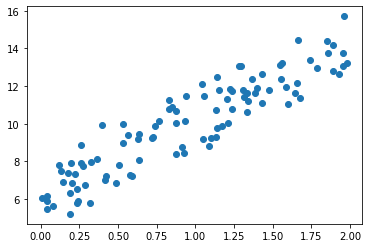

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6을 근사(w1=4, w0=6), 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [3]:
# 비용 함수 정의
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

In [4]:
# 경사하강법 구현
# w1, w0을 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, x, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(x, w1.T)+w0
  diff = y-y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))
  # w1과 w0을 업데이트할 w1_update와 w0_update를 계산
  w1_update = -(2/N)*learning_rate*(np.dot(x.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [5]:
# 경사 하강 방식 반복 수행 후 w1, w0 업데이트
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(x,y,iters=10000):
  # w0, w1을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update=get_weight_updates(w1, w0, x, y, learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update

  return w1, w0

In [7]:
# 예측값과 실제값의 RSS 차이 계산
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X,y,iters=10000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X + w0
print('Gradinet Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:3.968 w0:6.222
Gradinet Descent Total Cost:0.9924


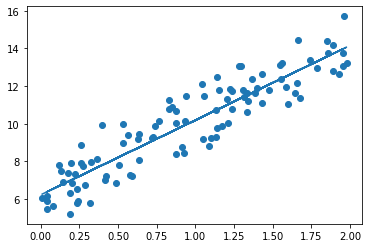

In [8]:
# 회귀선 그리기
plt.scatter(X,y)
plt.plot(X,y_pred)

In [9]:
# 대용량 데이터의 경우 속도를 위해 확률적 경사 하강법 이용
def stochastic_gradient_descent_steps(X,y, batch_size=10, iters=10000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X,y 데이터에서 랜덤하게 batch_size 만큼 데이터 추출해 sample_X, sample_y 지정
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update

  return w1, w0

In [10]:
w1, w0 = stochastic_gradient_descent_steps(X,y,iters=10000)
print('w1:', round(w1[0,0], 3), 'w0:', round(w0[0,0], 3))
y_pred = w1[0,0]*X+w0
print('stochastic gradient descent total cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 3.988 w0: 6.244
stochastic gradient descent total cost:0.9942


> 예측 성능 상 큰 차이 없음




#### **05. 다항 회귀와 과(대)적합/과소적합 이해**
: 회귀가 독립변수의 단항식이 아닌 다항식으로 표현되는 선형회귀
- PolynomialFeatures 클래스를 통해 피처를 다항식 피처로 변환
  + fit(), transform() 메서드를 통해 변환 작업 수행

> PolynomialFeatures를 이용해 단항값 [x1, x2]를 2차 다항값 [1, x1, x2, x1^2, x1x2, x2^2]로 변환하는 예제

In [11]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


> 단항 계수 피처를 2차 다항 계수 피처로 변환

- 3차 다항 회귀 함수를 임의로 설정하고 회귀 계수 예측하는 함수 생성

In [12]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


> 일차 단항식 계수를 삼차 다항식 계수로 변환 후 선형 회귀에 적용하면 다항 회귀로 구현

In [13]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


> 3차 다항식 변환 이후 계수 피처가 10개로 증가

- 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀 구현

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**다항 회귀를 이용한 과소적합 및 과적합 이해**
- 다항식의 차수가 높아질 수록 복잡한 피처 간의 관계 모델링 가능
  + 그러나 학습 데이터에만 너무 맞춘 학습이 이루어져 차수가 높아질수록 과적합의 문제 발생

> 피처 X와 target y가 잡음이 포함된 다항식의 코사인 그래프 관계를 가질 때 다항 회귀 차수 변화에 따른 예측 정확도 비교 예제

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y : 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

> 다항식 차수를 1, 4, 15로 변경하면서 예측 결과 비교
- 차수별 학습 수행 뒤 MSE 값을 구해 차수별 예측 성능 평가
- 차수별 회귀 예측 곡선 시각화


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415100e+06  2.03715130e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.32 입니다.


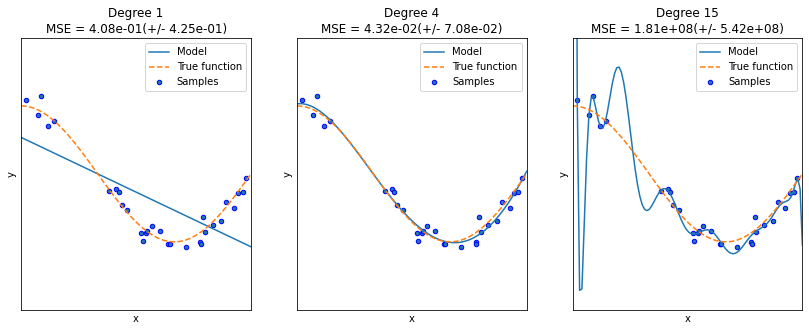

In [16]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

> 실선: 다항 회귀 예측 곡선 / 점선: 실제 데이터 세트 X, y의 코사인 곡선
- 왼쪽 곡선은 지나치게 단순한 직선으로 과소적합 모델
- 가운데 곡선은 실제 데이터와 유사한 모습으로 뛰어난 예측 성능을 보임
- 오른쪽 곡선은 MSE 값이 매우 큰 오류 값 발생, 실제 곡선과는 다른 형태의 과적합 모델



**편향-분산 트레이드오프(Bias-Variance Trade off)**
- 왼쪽 모델과 같이 매우 단순화된 모델은 지나치게 한 방향성으로 치우친 경향이 있음: 고편향성
- 오른쪽 모델은 지나치게 높은 변동성을 가짐: 고분산성
  + 저편향/저분산: 예측 변동이 크지 않고 특정 부분에 집중> 뛰어난 성능을 보임
  + 저편향/고분산: 예측 결과가 실제에 근접하지만 넓은 부분에 분포
  + 고편향/저분산: 정확한 결과에 벗어나면서 특정 부분에 예측 집중
  + 고편향/고분산: 예측 결과를 벗어나면서 넓은 부분에 분포

- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향을 보임
  + 고편향/저분산: 과소적합, 저편향/고분산: 과적합